# Multi Layer Perception

In [6]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns


# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocess data
# converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), #input layer
    tf.keras.layers.Dense(32, activation='relu'), #hiden layer
    tf.keras.layers.Dense(1) #output layer
])

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error:', loss)

# make predictions
predictions = model.predict(X_test)



Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 11.2071 - mae: 2.9760
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 9.1810 - mae: 2.6319
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 7.5308 - mae: 2.3029
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 6.0330 - mae: 1.9852
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 4.7426 - mae: 1.6901
Epoch 6/100
7/7 [==============================] - 0s 1ms/step - loss: 3.6836 - mae: 1.4346
Epoch 7/100
7/7 [==============================] - 0s 1ms/step - loss: 2.8266 - mae: 1.2315
Epoch 8/100
7/7 [==============================] - 0s 1ms/step - loss: 2.1586 - mae: 1.0793
Epoch 9/100
7/7 [==============================] - 0s 1ms/step - loss: 1.7370 - mae: 0.9876
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 1.4832 - mae: 0.9337
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 1.3288

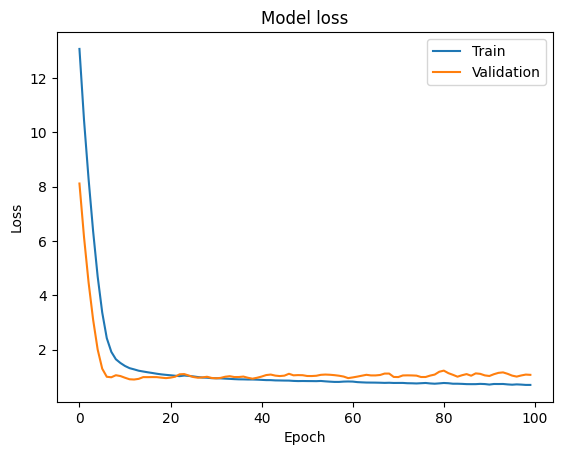

In [7]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## `Assignment`: What is a validation set? or validation loss?
In `machine learning`, a **validation set** is a subset of the dataset that is used to assess the performance of a model during training. It is distinct from the training set, which is used to train the model's parameters, and the test set, which is used to evaluate the model's performance on unseen data. The validation set provides an unbiased evaluation of a model fit during training, helping to detect overfitting.

During the training process, the model's performance is monitored on the validation set at regular intervals. The **validation loss** is a measure of how well the model is performing on the validation set. It is typically calculated using a loss function (e.g., mean squared error for regression problems or cross-entropy loss for classification problems). The goal is to minimize the validation loss.

If the model's performance on the training set improves, but the performance on the validation set starts to degrade, it may indicate overfitting. Overfitting occurs when a model learns to perform well on the training data but fails to generalize to new, unseen data. Monitoring the validation loss helps in choosing the best iteration of the model during training and avoiding overfitting.


# Call Back function
In deep learning, a **callback** is a set of functions to be applied at various stages of the training process. Callbacks can be used to perform tasks such as saving model checkpoints, stopping training early, adjusting learning rates dynamically, and logging metrics during training.

When it comes to the concept of **epochs**, a callback function related to epochs is often used for tasks like early stopping and model checkpointing. Here's an explanation of two common callback functions related to epochs:

1. **EarlyStopping Callback:**
   - **Purpose:** Monitors a specified validation metric and stops training if the metric stops improving.
   - **Parameters:**
     - `monitor`: The metric to monitor (e.g., 'val_loss' for validation loss).
     - `patience`: Number of epochs with no improvement after which training will be stopped.
     - `mode`: Whether to monitor the metric for improvement ('min', 'max', or 'auto').
     - Example:
       ```python
       from tensorflow.keras.callbacks import EarlyStopping

       early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min')
       ```

2. **ModelCheckpoint Callback:**
   - **Purpose:** Saves the model after every epoch or when a specified metric has improved.
   - **Parameters:**
     - `filepath`: Path to save the model file.
     - `monitor`: The metric to monitor for saving the best model.
     - `save_best_only`: If True, it only saves the best model based on the monitored metric.
     - Example:
       ```python
       from tensorflow.keras.callbacks import ModelCheckpoint

       model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)
       ```

These callback functions can be passed to the `callbacks` parameter when fitting a model using the `fit` method. For example:

```python
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])
```

This way, the model will use the specified callbacks during training, and you can customize the behavior based on your requirements.

Epoch 1/100
7/7 [==============================] - 0s 20ms/step - loss: 11.8263 - val_loss: 7.1986
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 9.5512 - val_loss: 5.5405
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 7.7481 - val_loss: 4.2169
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 6.2157 - val_loss: 3.1382
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 4.8852 - val_loss: 2.2858
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 3.7467 - val_loss: 1.7072
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 2.8509 - val_loss: 1.3860
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 2.2316 - val_loss: 1.2397
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 1.7807 - val_loss: 1.2580
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 1.5660 - val_loss: 1.3285
Epoch 11/100
7/7 [=========

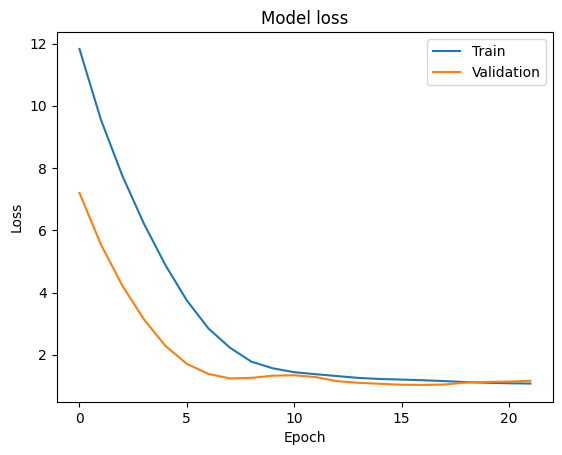

In [8]:
# Importing the necessary libraries
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping


# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5) # stop the function if there is no imporvement for 5 epochs

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()